In [6]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
import numpy as np
from datetime import datetime
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [7]:
events = pd.read_csv('./catalog_3pt5.csv', comment='#', parse_dates = True, index_col='DateTime')
# convert timezone to Pacific time
events.index = events.index.tz_localize('UTC').tz_convert('US/Pacific')

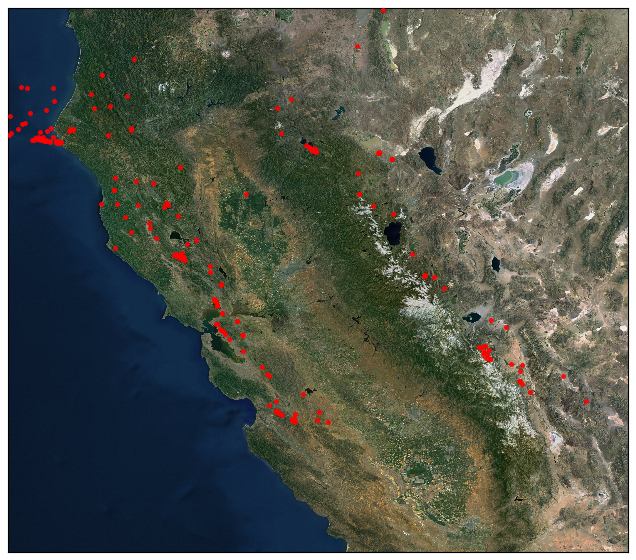

In [21]:
llat = 35.
llon = -125.
ulat = 42.
ulon = -117.

fig = plt.figure(figsize = (10, 12))
m = Basemap(projection='merc', lon_0=-121.36929, lat_0=37.3215, 
                llcrnrlon=llon,llcrnrlat=llat- 0.01,urcrnrlon=ulon,urcrnrlat=ulat + 0.01,resolution='l', epsg = 4269)

#m.drawcoastlines()
#m.drawcountries()
#m.fillcontinents(color='#cc9966',lake_color='#99ffff', alpha = 0.3)
#m.drawstates()

m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 5000, verbose= False)

lons = events.Longitude.values
lats = events.Latitude.values
x, y = m(lons,lats)
m.scatter(x,y,20,marker='o',color='r', alpha = 0.9, lw = 0, zorder = 10)

In [9]:
def plot_hist_24hour(occurance_list, ylabel = None):
    '''
    Function to plot the histogram of the earthquakes of the day
    '''
    plt.figure(figsize = (12, 8))
    hour_list = [t.hour for t in occurance_list]
    numbers=[x for x in np.arange(0.5,24)]
    labels=map(lambda x: str(int(x + 0.5)), numbers)
    plt.xticks(numbers, labels)
    plt.xlim(0,23)
    plt.hist(hour_list, bins = 23, alpha = 0.7)
    plt.xlabel('Hour', fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.show()

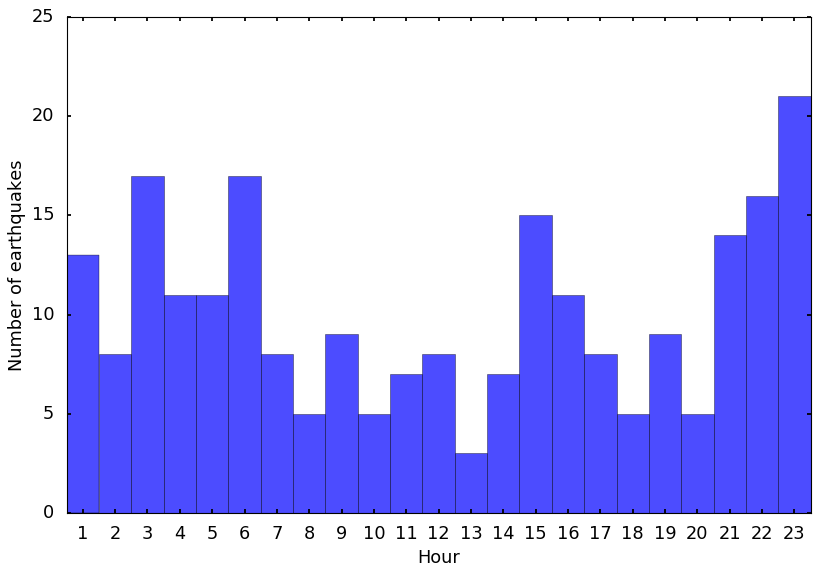

In [10]:
plot_hist_24hour(events.index, ylabel = 'Number of earthquakes')

In [11]:
def plot_eq_overtime(df, title):
    '''
    Function to plot a scatter plot of the earthquakes overtime.
    '''
    
    # get an array of the timestamp of the earthquake, and the hours across each day, you notice that 
    # for the y axis, we only need the hour, minute, second, so the date can be anything, I just
    # use 2016, 1, 1
    t_arr_sent = np.array([[t, datetime(2016,1,1, t.hour, t.minute, t.second)] for t in df.index])
    plt.figure(figsize = (12, 8))
    plt.plot_date(t_arr_sent[:, 0],t_arr_sent[:, 1],'.',alpha=.7)
    plt.xlabel('Date')
    plt.ylabel('Time')
    plt.title(title)
    plt.show()

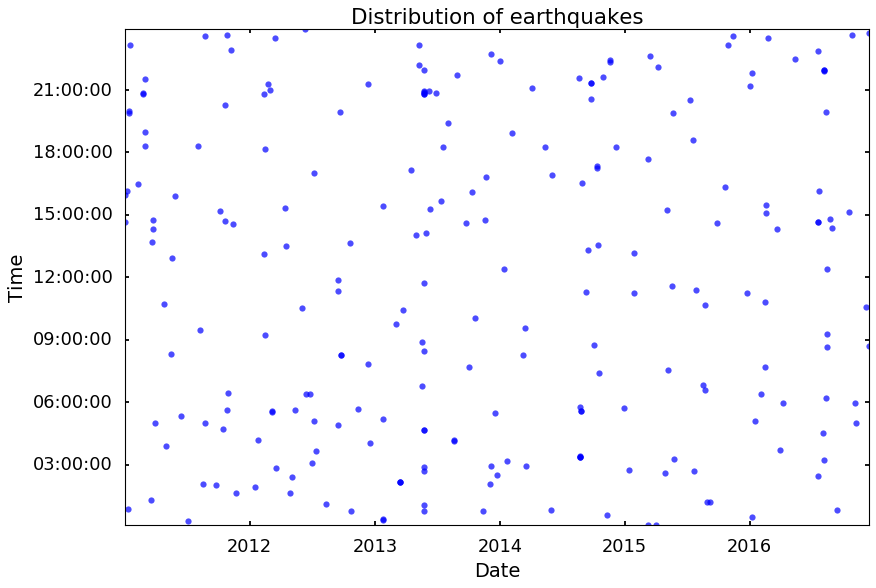

In [12]:
plot_eq_overtime(events, title = 'Distribution of earthquakes')

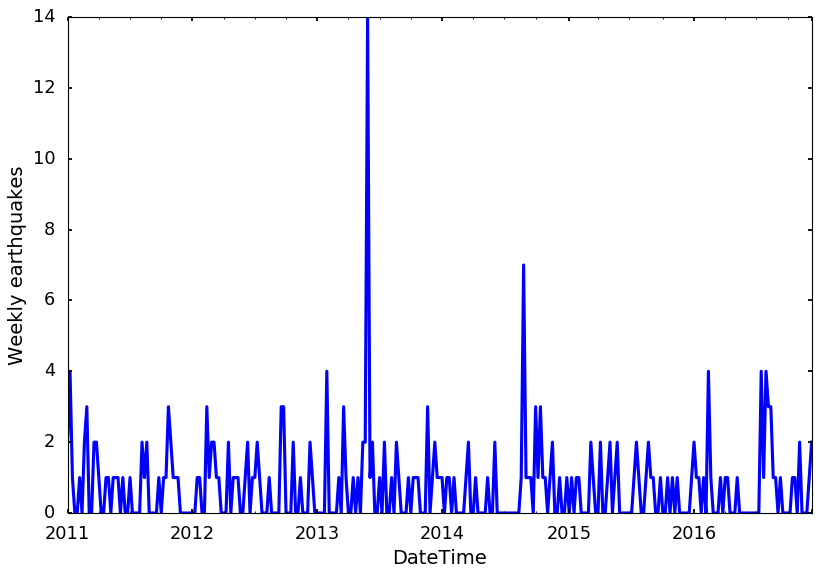

In [13]:
plt.figure(figsize = (12, 8))
weekly_count = events.Magnitude.resample('W-WED').count()
weekly_count.plot()
plt.ylabel('Weekly earthquakes');

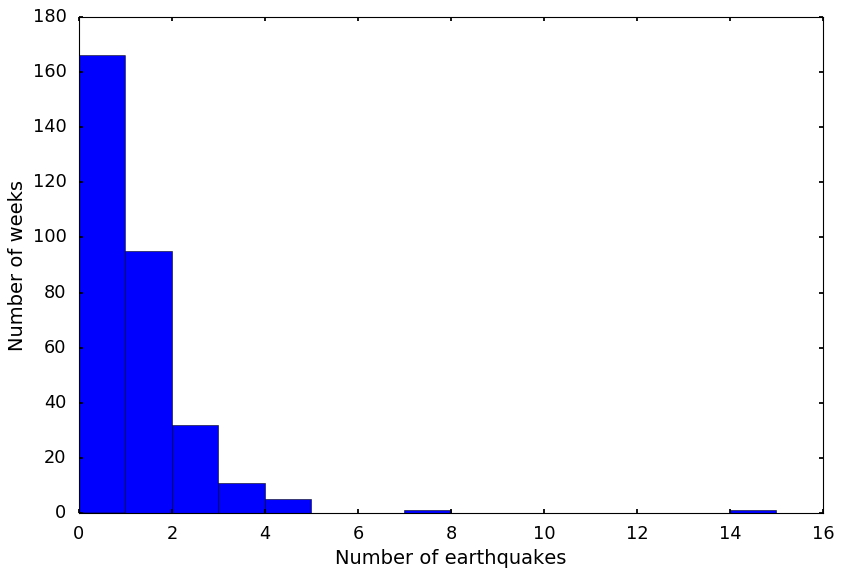

In [14]:
plt.figure(figsize = (12, 8))
weekly_count.hist(grid=False, bins = range(0, 17))
plt.xlabel('Number of earthquakes')
plt.ylabel('Number of weeks')

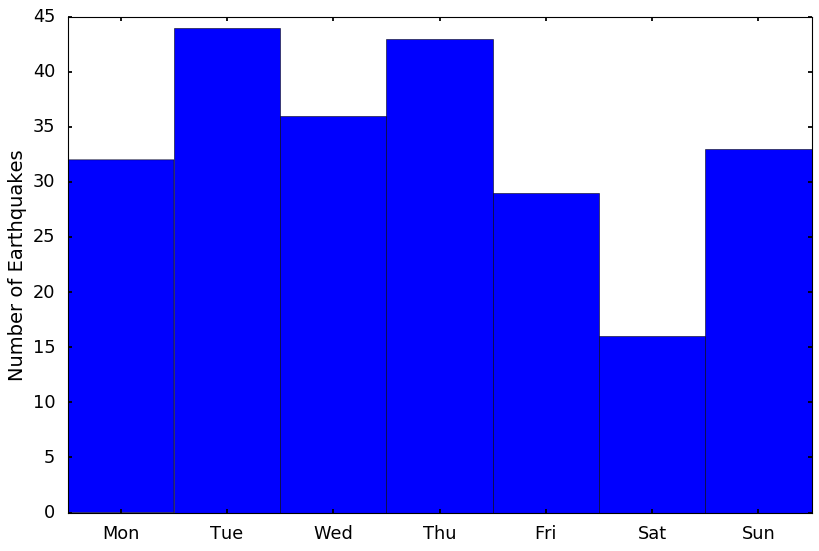

In [15]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.hist(events.index.weekday, bins = (0, 1, 2, 3, 4, 5, 6, 7))
weekdays = 'Mon Tue Wed Thu Fri Sat Sun'.split()
# But change the xtick labels to be the weekdays.
ax.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
ax.set_xticklabels(weekdays)
plt.ylabel('Number of Earthquakes')

In [16]:
weekly_count.describe()

count    311.000000
mean       0.749196
std        1.234500
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       14.000000
Name: Magnitude, dtype: float64